In [14]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.core.topologyobjects import Dihedral

#Z='../../project/gromacs/fi/ah8_30A'
Z= '1_curved15_45A'
#Z= '2_scratch15_30A'
#Z= '3_bound15_15A'
#Z= '4_tandem_30A'
#Z= '5_tandem_15A'
#Z= '6_tandem_CT2_30A'
#Z= '7_tandem_ex_CT2_30A'

u1 = mda.Universe(f'{Z}/N1/step7_400.nowat.tpr', f'{Z}/N1/traj_continuous_v1_400_reduced.xtc')
u2 = mda.Universe(f'{Z}/N2/step7_400.nowat.tpr', f'{Z}/N2/traj_continuous_v1_400_reduced.xtc')
u3 = mda.Universe(f'{Z}/N3/step7_400.nowat.tpr', f'{Z}/N3/traj_continuous_v1_400_reduced.xtc')
u4 = mda.Universe(f'{Z}/N4/step7_400.nowat.tpr', f'{Z}/N4/traj_continuous_v1_400_reduced.xtc')


In [2]:
float_ca = u1.select_atoms('name CA and not resid 1-34')
float_com =float_ca.center_of_mass(compound='residues')
ca_float_inds = float_ca.indices
ca_float_res = float_ca.residues

phos = u1.select_atoms('name P')
phos_com =phos.center_of_mass(compound='residues')
phos_com_ave_up = np.mean(phos_com[:40], axis=0)# [-100:] [:100]
phos_com_ave_low = np.mean(phos_com[-40:], axis=0)# [-100:] [:100]
midline= (phos_com_ave_up+phos_com_ave_low)/2

#residue_selection = "index " + " ".join(map(str, float_ca.indices)) # inex or resid!
#selected_peptide = u1.select_atoms(residue_selection)

c1= [float_com, u1]






In [3]:
com_z =[]
for j in [u1,u2,u3,u4]:
    for ts in j.trajectory[-2000:-1:10]:
        float_ca = j.select_atoms('name CA and not resid 1-34')
        float_com =float_ca.center_of_mass(compound='residues')
        com_z.append(float_com[:,2])  # Z-component is at index 2 in the COM array.
com_z = np.array(com_z)
print(com_z, np.shape(com_z))


[[ 93.37001038  90.26000214  91.53000641 ...  93.86000824  95.95000458
   95.65000916]
 [ 95.29000092  92.63000488  93.26000214 ...  99.05999756 100.52000427
   99.45999908]
 [ 92.12001038  89.31999969  90.16999817 ...  98.91000366  97.8500061
   95.97000122]
 ...
 [ 99.25        95.77999878  95.70999908 ... 108.26000214 107.06000519
  103.47000122]
 [ 97.75000763  94.13000488  93.69000244 ... 105.65000916 102.01000214
  100.79000854]
 [ 98.61000061  95.84000397  96.01000977 ... 108.18000793 107.46000671
  104.4200058 ]] (800, 34)


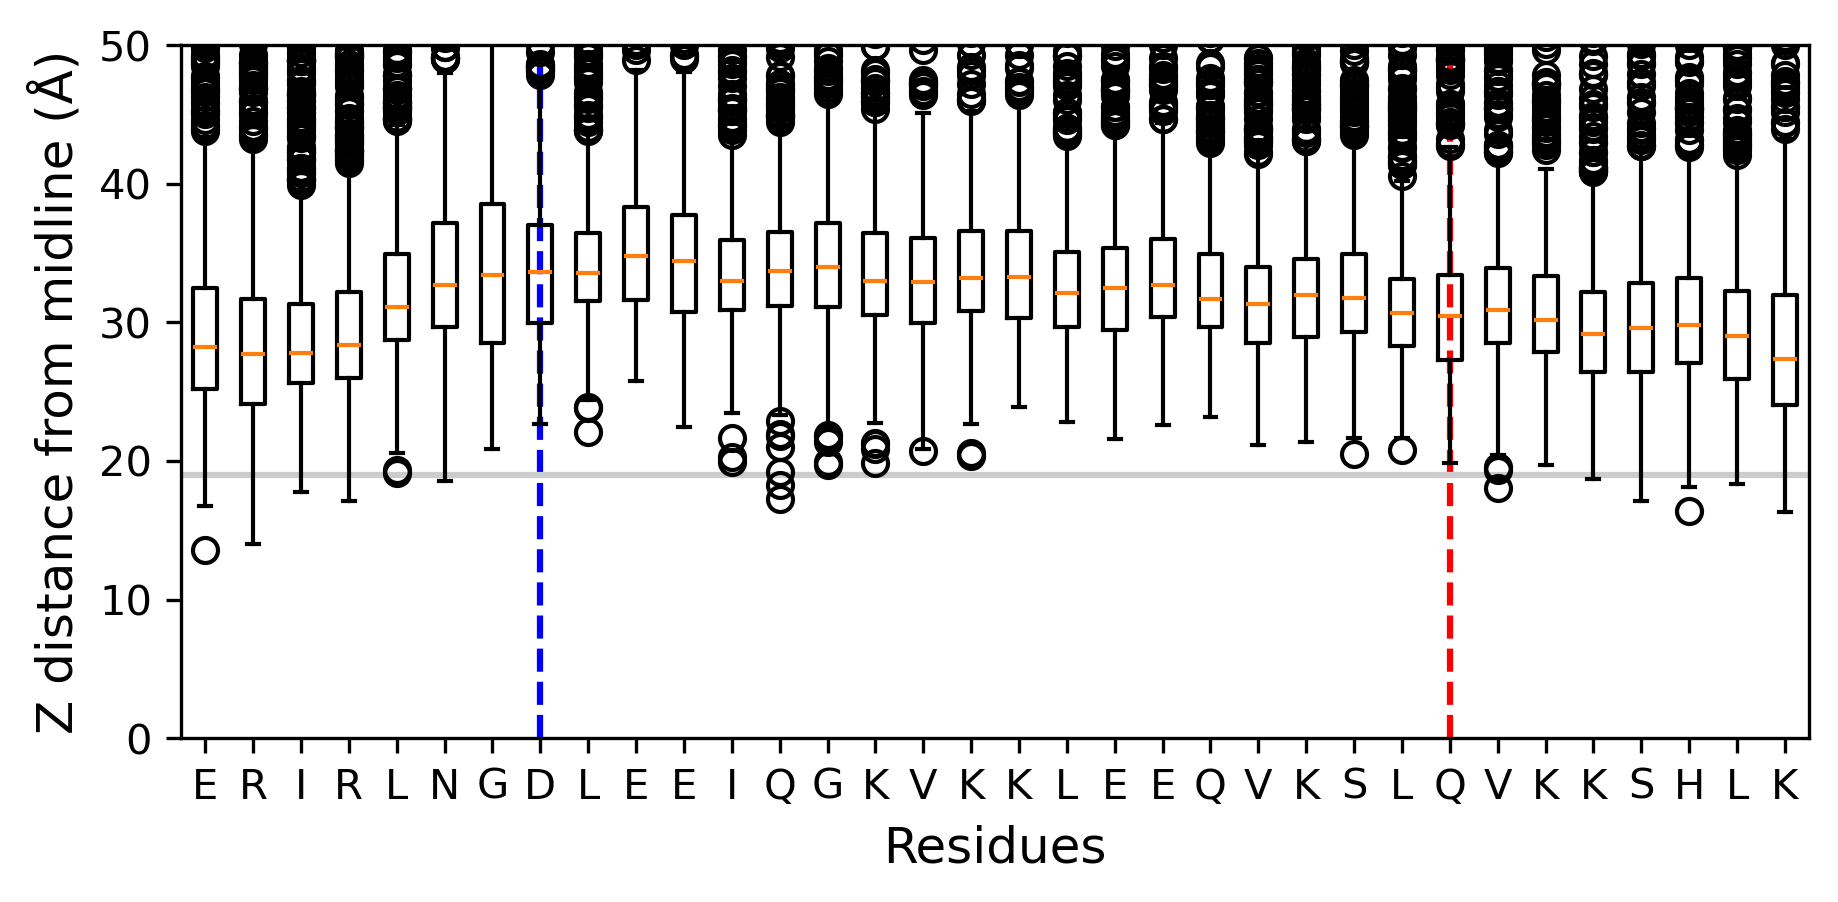

In [13]:
Xlabels = ['E','R','I','R','L','N','G','D','L','E','E','I','Q','G','K','V','K','K','L','E','E','Q','V','K','S','L','Q','V','K','K','S','H','L','K']
#Data_dict = {i:j for i,j in zip(Xlabels, com_z-midline[2])}
#Data_dict = {label: com_z[:, idx]-midline[2] for idx, label in enumerate(Xlabels)}
#print(len(Data_dict))
fig, ax = plt.subplots(figsize=(7,3),dpi=300)
#ax.boxplot(Data_dict.values())
#ax.violinplot(Data_dict.values(), showmeans=True, showmedians=False)

ax.axvline(8, ls='--', color='b')
ax.axvline(27, ls='--', color='r')
ax.axhline(19, ls='-', color='0.8')

ax.boxplot(abs(com_z-midline[2])) #-midline[2]
#ax.violinplot(com_z-midline[2], showmeans=True, showmedians=False)

ax.set_xticklabels(Xlabels, rotation=0)
#ax.set_xticklabels(Data_dict.keys(), rotation=0)


#plt.grid(which='major', axis='y')
plt.ylim(0,50)
plt.ylabel('Z distance from midline (Å)',fontsize=12)
plt.xlabel('Residues', fontsize=12)
#plt.title('Floating Extended AH in Presence of Bound Peptide', fontsize=12)
#plt.title('Extended Amphipathic Helix in Solution', fontsize=12)
plt.savefig(f'zresidues_{Z}_all.png',bbox_inches="tight")
#plt.savefig(f'zresidues_{Z}_all.eps', format='eps',bbox_inches="tight")

In [5]:
len(ax.get_xticklabels())

34

In [6]:
assert len(Xlabels) == com_z.shape[1],"The number of labels must match the number of columns in com_z"

In [7]:
len(Xlabels)

34

In [8]:
com_z.shape[1]

34

In [9]:
enumerate(Xlabels)

In [10]:
for label in enumerate(Xlabels):
    print(label)

(0, 'E')
(1, 'R')
(2, 'I')
(3, 'R')
(4, 'L')
(5, 'N')
(6, 'G')
(7, 'D')
(8, 'L')
(9, 'E')
(10, 'E')
(11, 'I')
(12, 'Q')
(13, 'G')
(14, 'K')
(15, 'V')
(16, 'K')
(17, 'K')
(18, 'L')
(19, 'E')
(20, 'E')
(21, 'Q')
(22, 'V')
(23, 'K')
(24, 'S')
(25, 'L')
(26, 'Q')
(27, 'V')
(28, 'K')
(29, 'K')
(30, 'S')
(31, 'H')
(32, 'L')
(33, 'K')
